<a href="https://colab.research.google.com/github/himanshu00243/chronic-kidney-disease-prediction/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

Using TensorFlow backend.


In [0]:
#load the data 
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("kidney_disease.csv")
    
#Print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [0]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

In [0]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [0]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [0]:
#Print / show the first 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [0]:
#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [0]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [0]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [0]:
#Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [0]:
#Compile the model
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer.
# The loss function we will use is binary_crossentropy for binary (2) classes.
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) #The number of samples per gradient update for training




Epoch 1/2000





229/229 [==============================] - 1s 3ms/step - loss: 0.6873 - acc: 0.4891
Epoch 2/2000
229/229 [==============================] - 0s 26us/step - loss: 0.6815 - acc: 0.4891
Epoch 3/2000
229/229 [==============================] - 0s 21us/step - loss: 0.6750 - acc: 0.5721
Epoch 4/2000
229/229 [==============================] - 0s 19us/step - loss: 0.6683 - acc: 0.6725
Epoch 5/2000
229/229 [==============================] - 0s 20us/step - loss: 0.6614 - acc: 0.7336
Epoch 6/2000
229/229 [==============================] - 0s 28us/step - loss: 0.6546 - acc: 0.7511
Epoch 7/2000
229/229 [==============================] - 0s 23us/step - loss: 0.6477 - acc: 0.7860
Epoch 8/2000
229/229 [==============================] - 0s 18us/step - loss: 0.6411 - acc: 0.7860
Epoch 9/2000
229/229 [==============================] - 0s 10us/step - loss: 0.6345 - acc: 0.7948
Epoch 10/2000
229/229 [==============================] - 0s 24us/step - loss: 0.6281 - acc: 0.7991
Epoch 11/200

In [0]:
#Save the model
model.save("ckd.model")

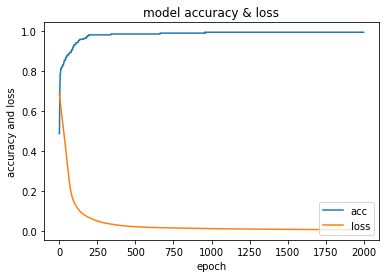

In [0]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [0]:
#Print the shape of the training and testing data
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
-------------------------------------------------------------------


In [0]:
#Loop through any and all saved models. Then get each models accuracy, loss, prediction and original values on the test data.
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print()

Model file:  ckd.model
58/58 [==============================] - 0s 946us/step

Original  : 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0

Predicted : 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0

Scores    : loss =  0.015169889288793864  acc =  1.0
-------------------------------------------------------------------

